## DataSet Choisie 

Les données utilisées dans cette étude de cas sont l’ensemble de données ISOT Fake News. 
les données contiennent deux types d'articles, de fausses et de vraies nouvelles. Cet ensemble de données a été collecté à partir de sources des informations réelles; les articles véridiques ont été obtenus en explorant des articles de Reuters.com (un site d'information). 
Quant aux faux articles, ils ont été collectés sur des sites Web peu fiables signalés par Politifact (une organisation de vérification des faits aux États-Unis) et Wikipédia. 
L'ensemble de données contient différents types d'articles sur différents sujets, cependant, la majorité des articles se concentrent sur des sujets politiques et d'actualité mondiale.
Chaque article des 2 fichiers contient les informations suivante : 
- title
- text
- subject
- date
Le nombre total d'enregistrements dans l'ensemble de données comprend 44 898 enregistrements, dont 21 417 sont de vraies nouvelles et 23 481 sont de fausses nouvelles.

### Par : Ikram, Malek et Sif


## Bibliotheques 

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import pycaret
from wordcloud import WordCloud
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

### 1- Analyse des catégorie des Datasets
Téléchargemnt de la DataSet 

In [2]:
df_fake = pd.read_csv('news/Fake.csv')


In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Liste des catégories des données des fake news

In [4]:
df_fake.isna().sum() # Checking for nan Values

title      0
text       0
subject    0
date       0
dtype: int64

nombre de catégories dans la table des fakes news

In [5]:
df_fake.subject.value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

#### On trace l'histogrammes du nombre de sujets

Text(0.5, 1.0, 'Distribution des titres par catégories Données fake')

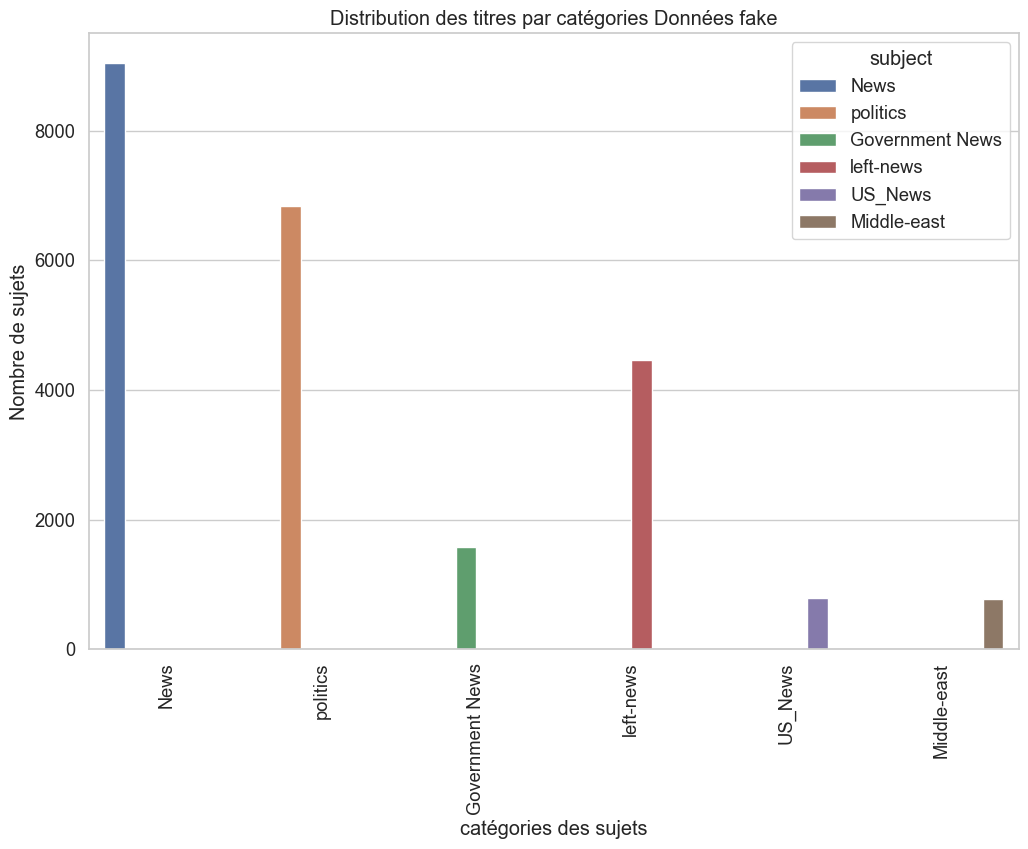

In [6]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "subject" , data = df_fake)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.xlabel('catégories des sujets')
plt.ylabel('Nombre de sujets')
plt.title('Distribution des titres par catégories Données fake')


In [7]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_fake.text.shape

(23481,)

Dans l'objectif de créer une seul table de données 
On va ajouter une colonne Fake 

In [9]:
df_fake['label'] ='FAKE' 

In [10]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


On va procéder de la même manière pour la table des données vrais

In [11]:
df_true = pd.read_csv('news/True.csv')

In [12]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


list des catégories des données des true news

In [13]:
df_true.isna().sum() # Checking for nan Values

title      0
text       0
subject    0
date       0
dtype: int64

nombre de catégories dans la table des true news

In [14]:
df_true.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

#### On trace l'histogrammes du nombre de sujets

Text(0.5, 1.0, 'Distribution des titres par catégories Données true')

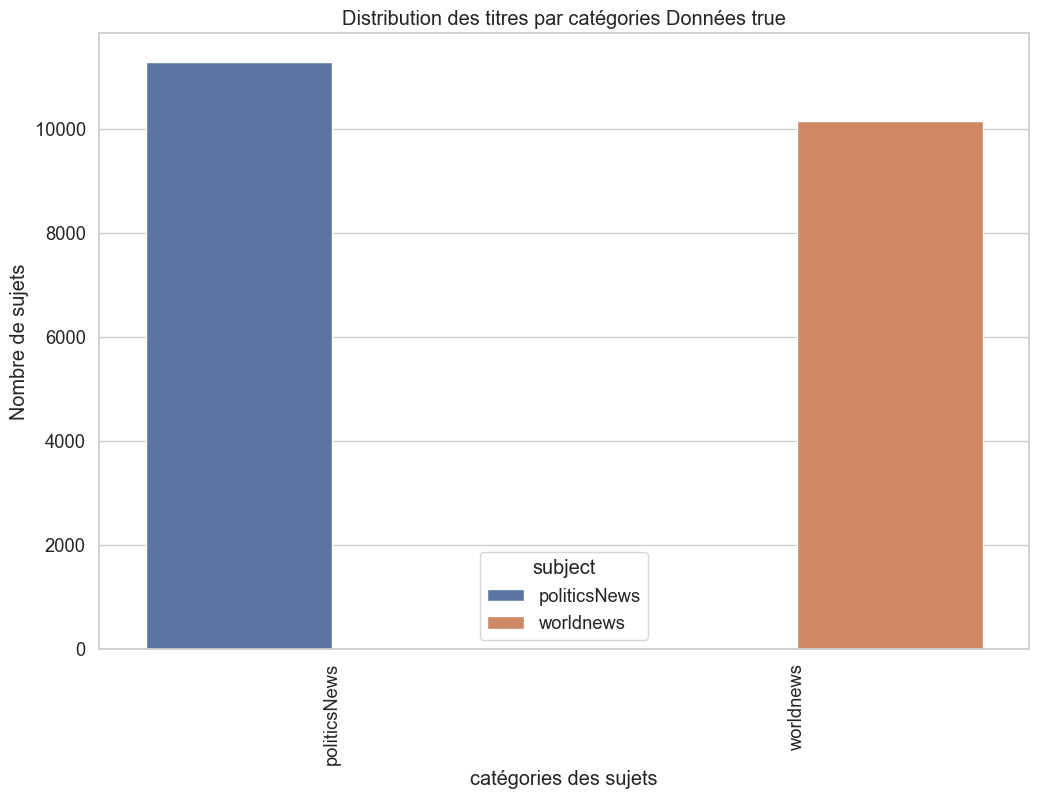

In [15]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "subject" , data = df_true)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.xlabel('catégories des sujets')
plt.ylabel('Nombre de sujets')
plt.title('Distribution des titres par catégories Données true')

### Conclusion sur les catégories de la DataSets
L'objectif est de garder que les données necessaires pour la phase d'apprentissage. 
La réduction de nombre de features est une phase importante.

Nous avonos constaté qu'il n'y a pas d'homogenité dans les catégories des 2 fichies qui vont être utiliser dans l'apprentissage.
dans le table des données vraies, il existe seulement 2 catégories politicsNews et wooldnew. en revanche la cattégorie politics et News sont séparées dans la table des fake news.

En plus de cette différence la catégorie "subject" lle n'apporte aucune information utile pour destinguer si une information est fake ou non.


La date est une donnée qui n'influe pas sur le faite que l'information est juste ou fause. Elle peut même devenir une source qui réduit la performation du model.

Conclusion :nous avons besoin que de la donnée "title" et "text" 


On va garder que les features utiles

### 2- Optimisation ou Réduction des features des Datasets
Suite à la conclusion de l'analye des catégories de la data set

In [16]:
df_fake=df_fake.drop(['subject','date'],axis=1)

In [17]:
df_false.head()

NameError: name 'df_false' is not defined

In [ ]:
df_fake.text.shape

Dans l'objectif de créer une seul table de données on va ajouter une colonne Fake

In [ ]:
df_fake['label']='FAKE'

In [ ]:
df_fake.head()

In [ ]:
df_true=df_true.drop(['subject','date'],axis=1)

In [ ]:
df_true.head()

Même chose pour la table des nouvelles vraies 

In [ ]:
df_true['label']='TRUE'
df_true.head()

In [ ]:
# fonction pour tracer un camembert avec plusieurs valeurs 
def draw_camembert(valeurs, couleurs, labels, rayon):
    plt.figure(figsize=(5, 5))
    plt.pie(valeurs, colors=couleurs, labels=labels, autopct='%1.1f%%', startangle=140, radius=rayon)
    plt.axis('equal')  # Pour que le camembert soit un cercle et non une ellipse
    plt.title('Pourcentage des données TRUE et des données FAKE ')
    plt.show()
    
def draw_histogramme(donnees, couleurs, etiquettes):
    plt.figure(figsize=(5, 5))
    plt.bar(etiquettes, donnees, color=couleurs)
    plt.xlabel('Catégories')
    plt.ylabel("Nombre d'informations True ou Fake")
    plt.title('Nombre des des données de la DataSet')
    plt.show()    

### 3- Analyse de l'Equilibrage des Données 


In [ ]:
#fig, axes = plt.subplots(1, 2, figsize = (20, 12))

valeurs = [df_true.shape[0], df_fake.shape[0]]  # Deux valeurs à représenter
couleurs = ['blue', 'orange']  # Deux couleurs correspondant aux deux valeurs
labels = ['TRUE', 'FAKE']  # Labels correspondants aux valeurs
draw_camembert(valeurs, couleurs, labels,1)
draw_histogramme(valeurs, couleurs, labels)
print("Les données sont casiment équivalentes entre les données fake et les données true")
print(f"Une différence de {round(abs(df_true.shape[0]-df_fake.shape[0])*100/(df_true.shape[0]+df_fake.shape[0]),2)}% n'est pas trés importante" )
print("Nous considérent que les données sont bien équilibrées")
print("Nous pouvons équilibrer les données en ajustant les la table des Fake news mais étant la taile de nombre de données il nous semble pas necessaire ")



### 4-  Statistiques sur le nombre de caractèteres par theme abordés¶
#### a) Analyse de la taille des titres 

In [ ]:
table = "sqfqsf qsfqsfqs qsfqsf"
longueur = len(table)
print(longueur)  # Affiche la longueur de la chaîne

In [ ]:
df_title=df_fake['title'].str.len()
fig,ax= plt.subplots(figsize=(15,6))
sns.distplot(df_title,ax=ax,color='pink')
ax.set_title('Title / fake data')
plt.show()

df_title=df_true['title'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_title,ax=ax,color='pink')
ax.set_title('Title / data true')
plt.show()
print("On constate que tandence de la distribution de la taille des titres est equivalente, en revanche le centre des courbes est différent.  ")
print("ce centre repréente la valeur la densité des texts avec des longeurs élevées")


#### b) Analyse de la taille des texts

In [ ]:
df_title=df_fake['text'].str.len()
fig,ax= plt.subplots(figsize=(15,6))
sns.distplot(df_title,ax=ax,color='pink')
ax.set_title('Text in fake data')
plt.show()

df_title=df_true['text'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_title,ax=ax,color='pink')
ax.set_title('Texle in data true')
plt.show()
print(" ........azhzuefgzeiurzeuirhz ")
print(" qefjselghsdgndfgn")


#### c) Analyse des mots importans dans les titres

In [ ]:
titles = " ".join(title for title in df_fake["title"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
titles = " ".join(title for title in df_true["title"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### d) Analyse des thermes importans dans les texts

In [ ]:
plt.figure(figsize=(20,10))
#fig, axes = plt.subplots(111, figsize = (20, 12))
texts = " ".join(text for text in df_fake["text"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts)
plt.subplot(121)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")



In [ ]:
fig, axes = plt.subplots(111, figsize = (20, 12))
texts = " ".join(text for text in df_true["text"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts)
plt.subplot(122)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()


Conclusion :
    azfhqaufhzefbzeifbzebfuzebg
    
    
    On constate que Trump est le mot qui revient soit dans les texts soit dans les titres

#### d) Analyse de la taille des mots
mots des texts

In [ ]:
# Suppose 'text' column contains text data
word_lengths = df_fake['text'].str.split().apply(lambda x: [len(i) for i in x])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot distribution of mean word length
sns.distplot(word_lengths.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title("Distribution de la longeur d'un mot dans le text pour les données fake news" )
ax1.set_xlabel('nombre de lettres dans un mot')

# Suppose 'text' column contains text data
word_lengths = df_true['text'].str.split().apply(lambda x: [len(i) for i in x])

# Plot distribution of mean word length
sns.distplot(word_lengths.map(lambda x: np.mean(x)), ax=ax2, color='blue')
ax2.set_title("Distribution de la longeur d'un mot dans le text pour les données vraies" )
ax2.set_xlabel('nombre de lettres dans un mot')


In [ ]:
mots des "Title"

In [ ]:
# Suppose 'title' column contains text data
word_lengths = df_fake['title'].str.split().apply(lambda x: [len(i) for i in x])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot distribution of mean word length
sns.distplot(word_lengths.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title("Distribution de la longeur d'un mot dans le 'title' , données fake news" )
ax1.set_xlabel('nombre de lettres dans un mot')

# Suppose 'text' column contains text data
word_lengths = df_true['title'].str.split().apply(lambda x: [len(i) for i in x])

# Plot distribution of mean word length
sns.distplot(word_lengths.map(lambda x: np.mean(x)), ax=ax2, color='blue')
ax2.set_title("Distribution de la longeur d'un mot dans le 'title', données vraies" )
ax2.set_xlabel('nombre de lettres dans un mot')

conclusion :
zlkndazjkdbazjbdazfbazjkfbazkjfb

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df_fake.text)
corpus[:5]

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

### 5- Le stemming ou la lemmatization 

Le steaming est un algorithme utilisé en traitement automatique du langage naturel NPL pour réduire les mots à leur racine ou à leur forme de base. L'objectif principal du stemming est de normaliser les mots en les ramenant à leur forme canonique ou à leur radical, ce qui aide à regrouper les variantes de mots similaires.

Il existe différents algorithmes de stemming utilisés dans le domaine du PNL, nous allons utilisés la bibliotheque NLTK
La lemmatisation est un processus utilisé en NPL pour réduire les mots à leur forme canonique ou à leur forme de base. 

Contrairement au stemming, qui réduit les mots en supprimant simplement les suffixes, la lemmatisation tient compte de la morphologie du mot et le ramène à sa forme de dictionnaire ou à son lemme.

Généralement la lemmatisation est souvent utilisée dans des applications telles que la recherche d'information, la classification de texte, où il est important de traiter les mots de manière cohérente pour obtenir des résultats précis.
c'est le cas dans notre cas d'étude

d'aprés l'état de l'art dQDqdQ -> plusieurs articles conseillent plutôt la lemmization que le stemming



In [ ]:
data_train = pd.concat([df_true, df_fake], ignore_index=True)
data_train.head()

In [ ]:
# Récupération de la liste des stopwords en anglais
stop_words = set(stopwords.words('english'))

# Texte d'exemple
text = 

# Tokenization du texte
words = word_tokenize(text)

# Suppression des stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

# Lemmatisation des mots restants
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

De même, nous traiterons l'ensemble de données True et le fusionnerons davantage avec le bloc de données df_fake pour créer l'ensemble de données final. Le code correspondant est donné ci-dessous

Nous avons donc fusionné l'ensemble de données. Nous devons mélanger l’ensemble de données pour introduire un caractère aléatoire dans l’ensemble de données pour la phase d'apprentissage.

In [ ]:
df=df.reindex(np.random.permutation(df.index))
df.head()

In [ ]:
data_train.shape

In [ ]:
data_train.to_csv('fake_news.csv')